In [4]:
## Importing the libraries

In [44]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [6]:
## Importing the dataset

In [51]:
df = pd.read_excel('Concrete_Data.xls')
print(dataset)

      Cement (component 1)(kg in a m^3 mixture)  \
0                                         540.0   
1                                         540.0   
2                                         332.5   
3                                         332.5   
4                                         198.6   
...                                         ...   
1025                                      276.4   
1026                                      322.2   
1027                                      148.5   
1028                                      159.1   
1029                                      260.9   

      Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
0                                                   0.0       
1                                                   0.0       
2                                                 142.5       
3                                                 142.5       
4                                                 132.4       
...      

In [65]:
df['Blast Furnace Slag (component 2)(kg in a m^3 mixture)'].value_counts()

0.0      466
189.0     30
106.3     20
24.0      14
20.0      12
        ... 
175.0      1
161.0      1
110.5      1
186.7      1
164.2      1
Name: Blast Furnace Slag (component 2)(kg in a m^3 mixture), Length: 187, dtype: int64

In [36]:
## Check for NaN under an entire DataFrame

In [46]:
df.isnull().values.any()

False

In [ ]:
# There is no NaN values. So we don't need to do any data preprocessing

In [52]:
df.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [21]:
x = df.iloc[:, :-1].values #2 dimensional Nd array
y = df.iloc[:, -1].values #1 dimensional nd array

In [23]:
print(y)

[79.98611076 61.88736576 40.26953526 ... 23.69660064 32.76803638
 32.40123514]


In [24]:
print(x)

[[ 540.     0.     0.  ... 1040.   676.    28. ]
 [ 540.     0.     0.  ... 1055.   676.    28. ]
 [ 332.5  142.5    0.  ...  932.   594.   270. ]
 ...
 [ 148.5  139.4  108.6 ...  892.4  780.    28. ]
 [ 159.1  186.7    0.  ...  989.6  788.9   28. ]
 [ 260.9  100.5   78.3 ...  864.5  761.5   28. ]]


In [15]:
print(df.head())

   Cement (component 1)(kg in a m^3 mixture)  \
0                                      540.0   
1                                      540.0   
2                                      332.5   
3                                      332.5   
4                                      198.6   

   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
0                                                0.0       
1                                                0.0       
2                                              142.5       
3                                              142.5       
4                                              132.4       

   Fly Ash (component 3)(kg in a m^3 mixture)  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   

   Water  (component 4)(kg in a m^3 mixture)  \
0      

In [56]:
print(x.shape)
print(y.shape)

(1030, 8)
(1030,)


In [18]:
## Dataset doesn't have any categorical data. So therefore we don't need to encoding categorical data.

In [19]:
## Splitting the dataset into the Training set and Test set

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [26]:
## Training the Multivariate Linear Regression model on the Training set

In [28]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [57]:
regressor.coef_

array([ 0.12,  0.11,  0.09, -0.15,  0.31,  0.02,  0.02,  0.12])

In [58]:
regressor.intercept_

-30.37868994453789

In [60]:
regressor.score(x_test, y_test)

0.6368981103411095

In [29]:
## Predicting the Test set results

In [32]:
y_pred = regressor.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[39.16 26.06]
 [14.62 10.35]
 [61.44 79.3 ]
 [53.8  74.99]
 [24.68  9.69]
 [53.44 47.1 ]
 [46.05 59.  ]
 [27.02 22.72]
 [52.99 61.89]
 [37.76 52.12]
 [16.78 17.54]
 [39.38 48.15]
 [29.59 38.33]
 [35.97 17.2 ]
 [47.57 56.83]
 [56.55 55.25]
 [35.47 33.36]
 [29.58 34.68]
 [48.32 52.61]
 [35.09 39.94]
 [53.5  61.46]
 [32.64 27.63]
 [32.79 32.9 ]
 [47.86 41.64]
 [23.53 17.54]
 [23.5  26.85]
 [69.31 66.9 ]
 [26.45 21.06]
 [56.54 61.07]
 [48.28 66.95]
 [18.95 20.87]
 [36.74 48.79]
 [17.7  24.05]
 [19.86 47.81]
 [24.53 21.16]
 [15.48  6.94]
 [52.98 28.6 ]
 [27.89 26.31]
 [27.5  33.95]
 [26.1  25.72]
 [52.38 37.8 ]
 [30.71 35.17]
 [25.82 32.24]
 [35.35 37.81]
 [53.51 57.23]
 [53.83 33.4 ]
 [30.34 30.14]
 [43.74 33.8 ]
 [27.35 35.08]
 [58.29 52.91]
 [36.83 40.93]
 [19.22 21.75]
 [23.42 16.5 ]
 [34.66 42.35]
 [43.65 50.94]
 [47.11 64.02]
 [35.8  52.2 ]
 [52.9  53.39]
 [59.94 64.3 ]
 [36.71 44.52]
 [31.11 37.42]
 [20.47 22.14]
 [50.43 62.94]
 [55.42 45.7 ]
 [20.77 14.64]
 [44.38 53.58]
 [33.35 33

ValueError: x and y must be the same size

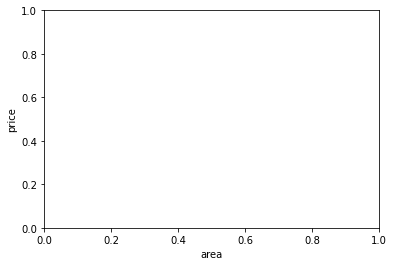

In [54]:
%matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(x[0],y,color='red',marker='+')

In [55]:
x[0]

array([ 540. ,    0. ,    0. ,  162. ,    2.5, 1040. ,  676. ,   28. ])

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [62]:
dataset = pd.read_csv('SeoulBikeData.csv')
dataset

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 12: invalid start byte

In [68]:
#import data-set
data_frame = pd.read_csv('https://raw.githubusercontent.com/madmashup/targeted-marketing-predictive-engine/master/banking.csv', encoding= 'unicode_escape',header=0)

In [67]:
data_frame

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0
